In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Read the CSV file
data = pd.read_csv('combined_20230622_195942.csv')

# Extract the input (EMG) features and output (finger angle) labels
X = data.iloc[2:, 1:9].values
y = data.iloc[2:, 9:].values

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
# Define the Random Forest regressor
regr = RandomForestRegressor()

In [40]:
# Train the regressor on the training data
regr.fit(X_train_pca, y_train)

RandomForestRegressor()

In [41]:
# Generate predicted result from the test data
y_pred = regr.predict(X_test_pca)

In [42]:
import matplotlib.pyplot as plt

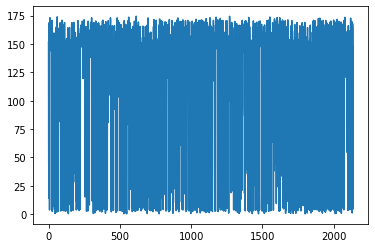

In [48]:
# Plot a column of ground truth (y data from testing portion)
plt.plot(y_test[:, 2:3])

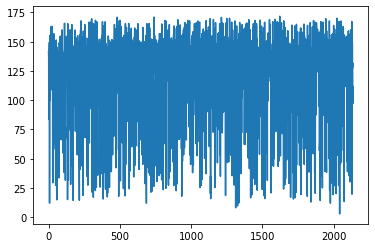

In [49]:
# Plot a column of predicted y data
plt.plot(y_pred[:, 2:3])

## The rest part is for parameter tuning
We are not doing this yet.

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the testing data
accuracy = best_estimator.score(X_test_pca, y_test)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)